In [1]:
## Screener 01

In [3]:
pip install tradingview_ta --upgrade

Note: you may need to restart the kernel to use updated packages.


In [2]:
# import the libraries that we going to use for the analysis
import pandas as pd
import numpy as np
from tradingview_ta import TA_Handler, Interval, Exchange
import yfinance as yf
import mplfinance as mpf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [3]:
tickers = [ 'IRFC',
            'RVNL',
            'IRCON',
            'MIDHANI',
            'SBIN',
            'INDHOTEL',
            'IOC',
            'HSCL',
            'PCBL',
            'FCL',
            'ITC',
            'VBL',
            'ONGC',
            'BCG',
            'WIPRO',
            'IREDA'
        ]

In [4]:
tickers_data = []

# Iterate through each ticker
for ticker in tickers:
    try:
        # Retrieve data for the ticker from NYSE
        data = TA_Handler(
            symbol=ticker,
            screener="india",
            exchange="NSE",
            interval="1d"
        )
        data = data.get_analysis().summary
        tickers_data.append(data)
        
    except Exception as e:
        # If no data is found for the ticker in NYSE, search in NASDAQ
        print(f"No data found for ticker {ticker} in NYSE. Searching in NASDAQ...")
        data = TA_Handler(
            symbol=ticker,
            screener="india",
            exchange="NSE",
            interval="1d"
        )
        data = data.get_analysis().summary
        tickers_data.append(data)

print("Data successfully imported.")

Data successfully imported.


In [5]:
recommendations = []
buys = []
sells = []
neutrals = []

# Iterate through each data in tickers_data
for data in tickers_data:
    recommendation = data.get('RECOMMENDATION')
    buy = data.get('BUY')
    sell = data.get('SELL')
    neutral = data.get('NEUTRAL')
    
    recommendations.append(recommendation)
    buys.append(buy)
    sells.append(sell)
    neutrals.append(neutral)

data = {
    'Ticker': tickers,
    'Recommendations': recommendations,
    'Buys': buys,
    'Sells': sells,
    'Neutrals': neutrals
}

df = pd.DataFrame(data)

In [6]:
# Define the order of categories
order_categories = {
    'STRONG_BUY': 5,
    'BUY': 4,
    'NEUTRAL': 3,
    'SELL': 2,
    'STRONG_SELL': 1
}

# Assign a numerical value to each category in a new column "Order"
df['Order'] = df['Recommendations'].map(order_categories)
df = df.sort_values('Order', ascending=True).reset_index(drop=True)

# Drop the "Order" column if not needed in the final output
df = df.drop('Order', axis=1)

# Display the sorted dataframe
df

,Ticker,Recommendations,Buys,Sells,Neutrals
0,BCG,STRONG_SELL,1,16,9
1,SBIN,SELL,6,11,9
2,FCL,SELL,6,12,8
3,ITC,NEUTRAL,8,9,9
4,IRFC,BUY,15,2,9
5,RVNL,BUY,14,3,9
6,IRCON,BUY,14,3,9
7,INDHOTEL,BUY,13,3,10
8,IOC,BUY,13,4,9
9,HSCL,BUY,14,3,9


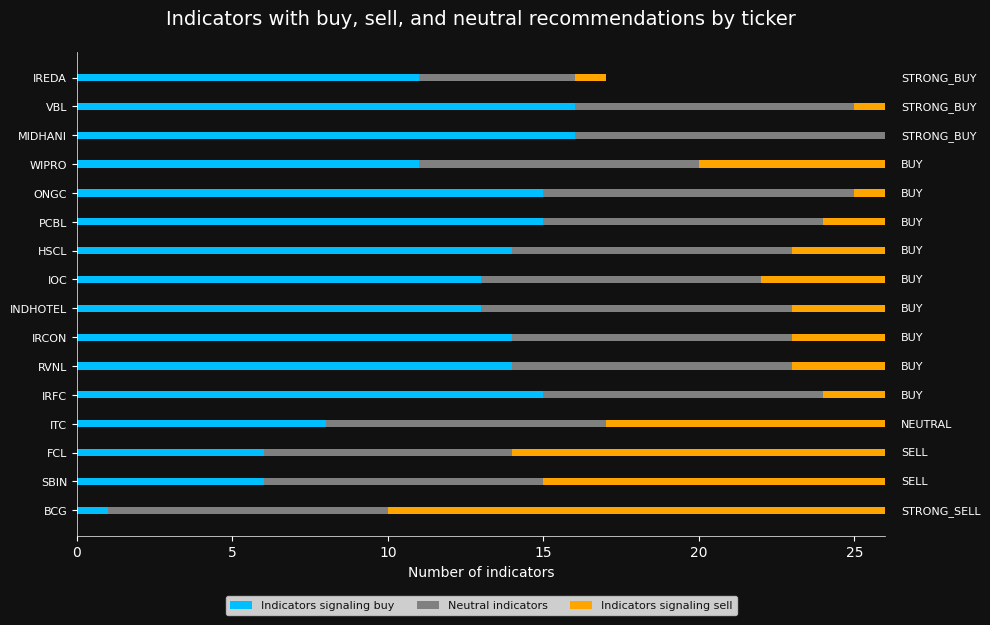

In [7]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('#111111')
ax.set_facecolor('#111111')

# Add the horizontal bars for buys, neutrals, and sells
ax.barh(df.index, df["Buys"], height=0.25, color='#00BFFF', label='Indicators signaling buy')
ax.barh(df.index, df["Neutrals"], height=0.25, color='#808080', label='Neutral indicators', left=df["Buys"])
ax.barh(df.index, df["Sells"], height=0.25, color='#FFA500', label='Indicators signaling sell', left=df["Buys"] + df["Neutrals"])

# Set the axes labels
ax.set_yticks(df.index)
ax.set_yticklabels(df["Ticker"], fontsize=8, color='white')
ax.set_xlabel('Number of indicators', fontsize=10, color='white')

# Add title with larger font size and additional spacing
ax.set_title('Indicators with buy, sell, and neutral recommendations by ticker', fontsize=14, color='white', pad=20)

# Add the annotations
for i, recommendation in enumerate(df["Recommendations"]):
    ax.annotate(recommendation, xy=(25, i), xytext=(26.5, i),
                color='white', fontsize=8, va='center', ha='left')

# Remove the horizontal grid lines
ax.yaxis.grid(False)

# Configure the tick and axis styles
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Adjust the spacing
plt.tight_layout()

# Set the text color of the legend to white
legend = ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.175), ncol=3, fontsize=8)
for text in legend.get_texts():
    text.set_color('#111111')

# Display the plot
plt.show()

In [8]:
df_adrs_indicators = pd.DataFrame()

for ticker in tickers:
    try:
        data = TA_Handler(
            symbol=ticker,
            screener="india",
            exchange="NSE",
            interval="1d"
        )
        data = data.get_analysis().indicators

    except Exception as e:
        print(f"No data found for ticker {ticker} in NYSE. Searching in NASDAQ...")
        data = TA_Handler(
            symbol=ticker,
            screener="india",
            exchange="NSE",
            interval="1d"
        )
        data = data.get_analysis().indicators
        
    df_temp = pd.DataFrame(data, index=[ticker])
    df_adrs_indicators = pd.concat([df_adrs_indicators, df_temp])

df_adrs_indicators.columns = df_adrs_indicators.columns.astype(str)
print("Data successfully imported.")

Data successfully imported.


/tmp/ipykernel_5743/1404176999.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_adrs_indicators = pd.concat([df_adrs_indicators, df_temp])


In [9]:
# Filter stocks with EMA crossing SMA
df_filtered = df_adrs_indicators[df_adrs_indicators['EMA30'] > df_adrs_indicators['EMA50']]

# Filter stocks with RSI above 70 (overbought)
df_filtered = df_filtered[df_filtered['RSI'] > 75]

# Filter stocks with positive MACD (signal line crossover)
df_filtered = df_filtered[df_filtered['MACD.macd'] > df_filtered['MACD.signal']]

# Filter stocks with ADX above a certain threshold (indicating a strong trend)
df_filtered = df_filtered[df_filtered['ADX'] > 30]

# Print the stocks that meet the criteria
filtered_shares = df_filtered.index.to_list()

print('Shares filtered:', filtered_shares)

Shares filtered: ['IRFC', 'RVNL']


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['IRFC']: Exception('%ticker%: No timezone found, symbol may be delisted')


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

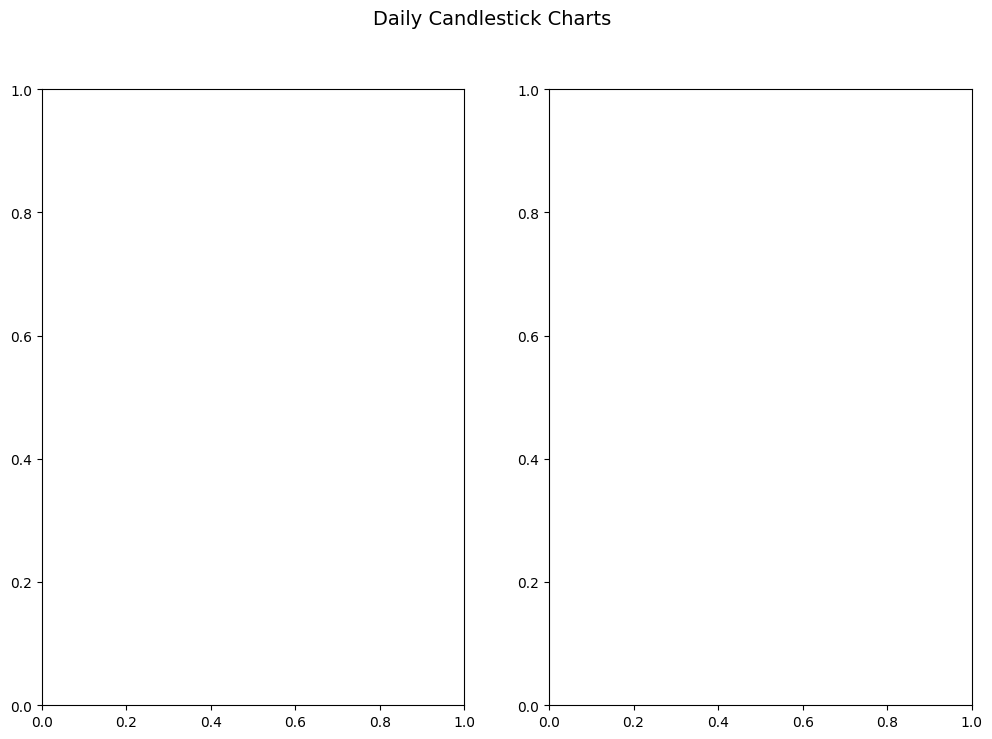

In [10]:
# Get the current date
end_date = datetime.now().strftime("%Y-%m-%d")

# Calculate the start date (3 months ago from today)
start_date = (datetime.now() - timedelta(days=3 * 30)).strftime("%Y-%m-%d")

# Calculate the number of rows and columns based on the desired layout
num_rows = (len(filtered_shares) + 1) // 2
num_cols = 2

# Create a figure with subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))
fig.suptitle("Daily Candlestick Charts", fontsize=14)

# Iterate over each stock and add a subplot for each one
for i, symbol in enumerate(filtered_shares):
    # Calculate the row and column index for the current subplot
    row = i // num_cols
    col = i % num_cols

    # Get historical data from Yahoo Finance
    data = yf.download(symbol, start=start_date, end=end_date)

    # Plot the candlestick chart in the subplot
    mpf.plot(data, type='candle', ax=axes[row, col], volume=False, show_nontrading=False)

    # Set the title of the subplot
    axes[row, col].set_title(symbol)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()